# Intégration numérique
## Fiche de correction
### Alban Gossard (gossard@insa-toulouse.fr)

### Importation de packages pour Python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Les méthodes d'intégration numérique

Soient $a$ et $b$ deux réels tels que $a < b$ et $f$ une fonction continue sur $[a,b]$. Le but de ce TP est d'implémenter les méthodes d'intégration vu en cours: la méthode des rectangles, la méthode du point milieu, la méthode des trapèzes et la méthode de Simpson. Ces méthodes donnent une approximation de l'intégrale
$$
I(f,a,b) = \int_a^b f(x)dx.
$$
On s'intéressera en particulier aux erreurs d'approximation obtenues.

L'intégration numérique se fera sur l'intervalle $[a,b]$, que l'on discrétise comme une suite de sous-intervalles $[x_{j-1},x_j]$ dont la longueur est uniforme. En particulier, pour tout $n\geq 1$, on pose
$$
x_j = a + j\frac{b-a} n = a + jh, \quad 0\leq j\leq n,
$$
où l'on note $h = \frac{b-a}n$.

Afin de tester les méthodes, on utilisera l'intégrale continue suivante, dont on calcule explicitement la valeur,
$$
I_e = \int_a^b\cos(x) dx = \left[ \sin(x) \right]^b_a = \sin(b) - \sin(a).
$$

In [2]:
def f_ex(x):
    return np.cos(x)

### Méthode des rectangles

La méthodes des rectangles consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Rect},1}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j-1}),
$$
pour les rectangles à gauche, et
$$
I_{n,\textrm{Rect},2}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j}),
$$
pour les rectangles à droite.

>**A faire :** Écrire une fonction **Rect** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode des rectangles à gauche et à droite. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [3]:
def Rect(f,a,b,n):
    # Renvoie les approximations de l'intégrale par la méthode des rectangles à gauche et la méthode des rectangles à droite
    # f (type fonction): fonction à intégrer
    # a (scalaire):      borne inférieure de l'intervalle
    # b (scalaire):      borne supérieure de l'intervalle
    I1=((b-a)/n)*np.sum([f(a+(j)*(b-a)/n) for j in range(n)])     # rectangle à gauche
    I2=((b-a)/n)*np.sum([f(a+(j)*(b-a)/n) for j in range(1,n+1)]) # rectangle à droite
    return I1, I2

In [4]:
a,b,n = 0.,2.,10
I1, I2 = Rect(f_ex,a,b,n)
Ie = np.sin(b)-np.sin(a)
print('I Rect 1 =',I1)
print('I Rect 2 =',I2)
print('I_e =', Ie)

I Rect 1 = 1.0478790964703297
I Rect 2 = 0.7646497291609012
I_e = 0.9092974268256817


### Méthode du point milieu

La méthodes du point milieu consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Milieu}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j-1/2}),
$$
où l'on note
$$
x_{j-1/2} = \frac{x_{j-1} + x_j}2.
$$

>**A faire :** Écrire une fonction **Milieu** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode du point milieu. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [5]:
def Milieu(f,a,b,n):
    # Renvoie l'approximation de l'intégrale par la méthode du point milieu
    # f (type fonction): fonction à intégrer
    # a (scalaire):      borne inférieure de l'intervalle
    # b (scalaire):      borne supérieure de l'intervalle
    return ((b-a)/n)*np.sum([f((a+(j)*(b-a)/n + a+(j+1)*(b-a)/n)/2.) for j in range(n)])

In [6]:
Im = Milieu(f_ex,a,b,n)
print("Valeur exacte de l'intégrale =", Ie)
print("Méthode du milieu =", Im)
print("Erreur sur la méthode du milieu =", abs(Im-Ie))

Valeur exacte de l'intégrale = 0.9092974268256817
Méthode du milieu = 0.9108146924815994
Erreur sur la méthode du milieu = 0.001517265655917699


### Méthode des trapèzes

La méthodes des trapèzes consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Trapèzes}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} \frac{f(x_{j-1}) + f(x_{j})}2,
$$
que l'on peut encore écrire
$$
I_{n,\textrm{Trapèzes}}(f,a,b) = \frac12\left(I_{n,\textrm{Rect},1}(f,a,b) + I_{n,\textrm{Rect},2}(f,a,b) \right).
$$

>**A faire :** Écrire une fonction **Trapezes** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode des trapèzes. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [7]:
def Trapezes(f,a,b,n):
    # Renvoie l'approximation de l'intégrale par la méthode des trapèzes
    # f (type fonction): fonction à intégrer
    # a (scalaire):      borne inférieure de l'intervalle
    # b (scalaire):      borne supérieure de l'intervalle
    I1,I2 = Rect(f,a,b,n)
    return (I1+I2)/2.

In [8]:
It = Trapezes(f_ex,a,b,n)
print("Valeur exacte de l'intégrale =", Ie)
print("Méthode des trapèzes =", It)
print("Erreur sur la méthode des trapèzes =", abs(It-Ie))

Valeur exacte de l'intégrale = 0.9092974268256817
Méthode des trapèzes = 0.9062644128156154
Erreur sur la méthode des trapèzes = 0.0030330140100662817


### Méthode de Simpson

La méthodes du point milieu consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Simpson}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} \frac 1 6 \left(f(x_{j-1}) + 4 f(x_{j-1/2})+ f(x_{j}) \right),
$$
que l'on peut encore écrire
$$
I_{n,\textrm{Simpson}}(f,a,b) = \frac 1 3 \left(I_{n,\textrm{Trapèzes}}(f,a,b)+ 2I_{n,\textrm{Milieu}}(f,a,b)\right).
$$

>**A faire :** Écrire une fonction **Simpson** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode de Simpson. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [9]:
def Simpson(f,a,b,n):
    # Renvoie l'approximation de l'intégrale par la méthode de Simpson
    # f (type fonction): fonction à intégrer
    # a (scalaire):      borne inférieure de l'intervalle
    # b (scalaire):      borne supérieure de l'intervalle
    return (1./3.)*(Trapezes(f,a,b,n)+2.*Milieu(f,a,b,n))

In [10]:
Is = Simpson(f_ex,a,b,n)
print("Valeur exacte de l'intégrale =", Ie)
print("Méthode de Simpson =", Is)
print("Erreur sur la méthode de Simpson =", abs(Is-Ie))

Valeur exacte de l'intégrale = 0.9092974268256817
Méthode de Simpson = 0.9092979325929381
Erreur sur la méthode de Simpson = 5.05767256409051e-07


### Analyse de l'erreur d'approximation et ordre des méthodes

On se propose à présent d'analyser l'erreur d'approximation commise par chacune des méthodes précédentes. L'analyse de cette erreur permettra notamment d'évaluer numériquement l'ordre des méthodes. On considère l'erreur d'approximation suivante
$$
e(n) = |I(f_{\textrm{ex}},a,b) - I_{n,\textrm{Méthode}}(f_{\textrm{ex}},a,b)|,
$$
où $I_{n,\textrm{Méthode}}(f,a,b)$ correspond à l'approximation de $I(f,a,b)$ obtenue avec une des méthodes que l'on a implémentées. L'ordre d'une méthode est défini comme étant le scalaire $p$ qui vérifie
$$
e(n) \underset{n\rightarrow\infty}{\sim} n^{-p}.
$$
Afin d'évaluer $p$, on va calculer
$$ \log(e(n)) \underset{n\rightarrow\infty}{\sim} -p\log(n),$$
et il suffira d'établir la pente de la courbe $(x,y) = (\log(n),\log(e(n))$ pour trouver $p$.


>**A faire :** Tracer sur une même figure les courbes $(\log(n),\log(e(n))$ pour les différentes méthodes d'intégration avec $a = 0$, $b = 10$ et identifier les ordres des méthodes. On prendre $n$ allant de $100$ jusqu'à $1000$. On pourra utiliser la fonction **plt.loglog** pour le tracer.

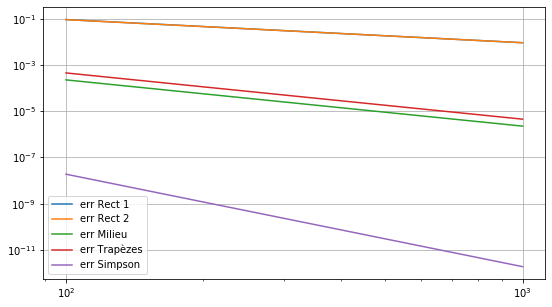

In [11]:
a,b=0.,10.
list_n=np.array([100*i for i in range(1,11)])
list_err_rect1=[]
list_err_rect2=[]
list_err_milieu=[]
list_err_trapezes=[]
list_err_simpson=[]
Ie = np.sin(b)-np.sin(a)
for n in list_n:
    I1, I2 = Rect(f_ex,a,b,n)
    Im = Milieu(f_ex,a,b,n)
    It = Trapezes(f_ex,a,b,n)
    Is = Simpson(f_ex,a,b,n)
    list_err_rect1.append(abs(I1-Ie))
    list_err_rect2.append(abs(I2-Ie))
    list_err_milieu.append(abs(Im-Ie))
    list_err_trapezes.append(abs(It-Ie))
    list_err_simpson.append(abs(Is-Ie))
plt.figure(figsize=(9,5))
plt.loglog(list_n,list_err_rect1,label='err Rect 1')
plt.loglog(list_n,list_err_rect2,label='err Rect 2')
plt.loglog(list_n,list_err_milieu,label='err Milieu')
plt.loglog(list_n,list_err_trapezes,label='err Trapèzes')
plt.loglog(list_n,list_err_simpson,label='err Simpson')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Facultatif: on peut s'amuser à calculer les ordres des méthodes en réalisant une régression linéaire.
# Cela consiste à chercher les paramètres d'une droite, son coefficient directeur et son ordonnée à l'origine, qui approxime le mieux possible notre courbe d'erreur.
# On pourrait recoder un algorithme de regression linéaire (très bon exercice pour s'entraîner!) mais la classe LinearRegression permet de le faire facilement en Python.
from sklearn.linear_model import LinearRegression

# Création d'une liste de liste pour pouvoir faire une boucle facilement
list_err_method=[list_err_rect1, list_err_rect2, list_err_milieu, list_err_trapezes, list_err_simpson]
# Création d'une liste du nom des méthodes
list_label_method=['Rect 1', 'Rect 2', 'Milieu', 'Trapèzes', 'Simpson']
# Boucle sur les méthodes
for err,label in zip(list_err_method, list_label_method):
    # On créé une régression linéaire
    regressor = LinearRegression()
    # On ajuste notre régression pour qu'elle corresponde le mieux possible à nos courbes d'erreur
    regressor.fit(np.log(list_n).reshape(-1,1), np.log(err).reshape(-1,1))
    # On récupère le coefficient directeur de la droite
    print('Méthode '+label+' : p =',-regressor.coef_[0,0])

Méthode Rect 1 : p = 1.0017615874568557
Méthode Rect 2 : p = 0.9982297527807514
Méthode Milieu : p = 2.0001038893343708
Méthode Trapèzes : p = 2.0000593673541767
Méthode Simpson : p = 4.000090451356734


## Approximation de la moyenne d'un signal aléatoire

L'objectif de cette section est d'évaluer une approximation de l'intégrale suivante
$$
m(t) = \frac 1 t \int_0^t s(\tau)d\tau, \quad t\in [0,T],
$$
pour $T>0$ et où $s$ est un signal aléatoire que l'on va simuler à l'aide de la fonction **Signal** ci-dessous (dont il n'est pas nécessaire de préciser les arguments d'entrée). On remarque que $T$ correspond alors à l'argument **T_max** qui est égal à 5.

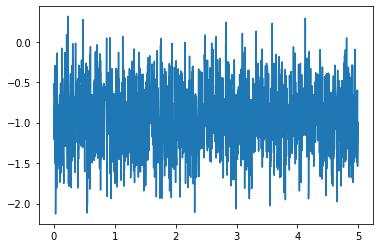

In [13]:
def Signal(n=2000, T_max=5, Amp_moy=1, Amp_sig=1):
    # Fonction renvoyant un array de taille n correspondant au signal aléatoire et un array de taille n correspondant aux temps t des échantillons
    # n (entier):      nombre de valeurs de discrétisation du signal aléatoire
    # T_max (float):   borne supérieure de l'intervalle
    # Amp_moy (float): valeur moyenne maximale pour le signal aléatoire
    # Amp_sig (float): valeur maximale pour l'écart type du signal aléatoire
    # Il faut bien comprendre ici que le signal aléatoire est une gaussienne dont les paramètres sont des réalisations eux-mêmes de variables aléatoires.
    T_acquis = np.sort(np.random.uniform(0,T_max,size=n))
    Moy = np.random.uniform(-Amp_moy,Amp_moy,size=1)
    Sigma = np.random.uniform(0,Amp_sig,size=1)
    return np.random.normal(Moy,Sigma,size=n), T_acquis
s,T = Signal()
plt.plot(T,s)
plt.show()

# Attention: plusieurs exécution du code ne produisent pas le même résultat.
# Ne vous étonnez donc pas de ne pas retrouver le même graphique !

Il est important de préciser que le signal est acquis en des temps qui ne sont pas uniformément répartis sur l'intervalle $[0,T]$. Il n'est donc pas envisageable d'utiliser la méthode du point milieu ou la méthode de Simpson qui requièrent d'avoir accès à une valeur intermédiaire (au milieu). On peut donc mettre en oeuvre la méthode des rectangles ou la méthode des trapèzes. Sachant que la méthode des trapèzes est plus précise, c'est cette dernière que l'on va mettre en oeuvre pour calculer l'intégrale. Dans le cas de points $(x_j)_{0\leq j\leq n}$ qui ne sont pas équirépartis sur $[0,T]$, la méthode des trapèzes s'écrit
$$
I_{n,\textrm{Trapèzes non-équis}}(f,a,b) = \sum_{j = 1}^{n} \frac{f(x_{j-1}) + f(x_{j})}2 (x_j - x_{j-1}),
$$

>**A faire :** Écrire une fonction **Trapeze_Nequi** permettant de mettre en oeuvre la méthode des trapèzes pour calculer l'intégrale d'une fonction $f$ en des points qui ne sont pas équirépartis. Cette fonction prendra en argument d'entrée le vecteur $F$ tel que $F_j = f(x_j)$, pour $0\leq j\leq n$, ainsi que le vecteur $X$ des points $(x_j)_{0\leq j\leq n}$. Elle donnera en sortie une approximation de l'intégrale de $f$ sur l'intervalle $[x_0,x_n]$.

In [14]:
def Trapeze_Nequi(F,X):
    # Fonction renvoyant le calcul de l'intégrale par la méthode des trapèzes
    # F (array de taille n): valeurs de la fonction aux différentes positions X
    # X (array de taille n): points d'échantillonnage du signal aléatoire
    return np.sum([(X[j+1]-X[j])*(F[j]+F[j+1])/2. for j in range(X.shape[0]-1)])

>**A faire :** Tracer, sur une même figure, le signal $s$ que vous aurez simulé ainsi $m$ que vous calculerez grâce à une approximation de l'intégrale de $s$ obtenue par la méthode des trapèzes.

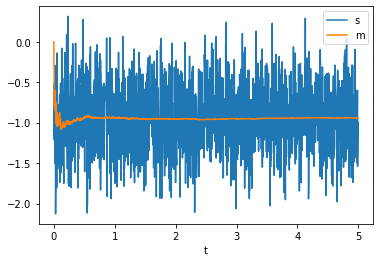

Estimation de la moyenne: -0.9417424318669543


In [15]:
# Il est important de comprendre qu'ici on calcule l'intégrale m(t) pour différentes valeurs de t.
# La borne supérieure de l'intégrale augmente donc avec t.
# Cela revient à calculer du signal pour différentes valeurs de t.
# Pour des petites valeurs de t, l'estimation est donc mauvaise, puis au fur et à mesure et que t augmente, l'estimation s'affine et m bouge de moins en moins.

m=np.zeros(s.shape[0])
for i in range(s.shape[0]):
    m[i]=Trapeze_Nequi(s[:i],T[:i])/T[i]
plt.plot(T,s,label='s')
plt.plot(T,m,label='m')
plt.legend()
plt.xlabel('t')
plt.show()
print("Estimation de la moyenne:",m[-1])